# Cross-validation

In [1]:
#import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
from sklearn import datasets

In [2]:
#Import matplotlib and seaborn
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#This is our global size of label text
#On the plots
matplotlib.rc("xtick",labelsize = 20)
matplotlib.rc("ytick",labelsize = 20)

In [4]:
import pandas as pd
df = pd.read_csv("data/winequality-red.csv", sep=';')

In [5]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
#a mapping dictionary that maps the quality values from0 to 5
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

#You can use the map function of pandas with
#any directory to convert the values in a given
#column to values in the directory
df.loc[:,"quality"] = df.quality.map(quality_mapping)

### 1).Hold-Out Cross validation

In [27]:
#use sample with frac=1 to shuffle the dataframe
#we reset the indices since they change after
#shuffling the dataframe
df = df.sample(frac = 1).reset_index(drop = True)


#Top 1000 rows are selected for training 
df_train  = df.head(1000)

#bottom 599 values are selected for testing/validation
df_test = df.tail(599)

In [28]:

def accuracy_cal(df_train,df_test,depth):

    """
parameters:
df_train : the data to train the decisionTreeClassifier model

df_test: the data to test the decisionTreeClassifier model

depth: define the depth of the tree.


return :
accuracy of test and training dataset
    """    
    

    #init the model
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    
    #columns/features for training
    #note that, this can be done outside
    #the loop
    cols = [
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol"
    ]
    
    #fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    
    #create training and test preditions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    #calculate training and test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality , train_predictions)
    
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    
        
    return (train_accuracy,test_accuracy)
    
    

In [29]:
#create two plots using matplotlib and seaborn 
def display(train_accuracies, test_accuracies):
    
    """
parameters:

train_accuracies : contain the accuracy of train data using decision tree model.

test_accuracies : contain the accuracy of the test data using decision tree model.

    """    
    
    plt.figure(figsize = (10,5))
    sns.set_style("whitegrid")
    plt.plot(train_accuracies , label = "train accuracy")
    plt.plot(test_accuracies , label = "test accuracy")
    plt.legend(loc = "upper left" , prop = {"size" : 15})
    plt.xticks(range(0,26,5))
    plt.xlabel("max depth",size = 2)
    plt.ylabel("accuracy",size= 20)
    plt.show()

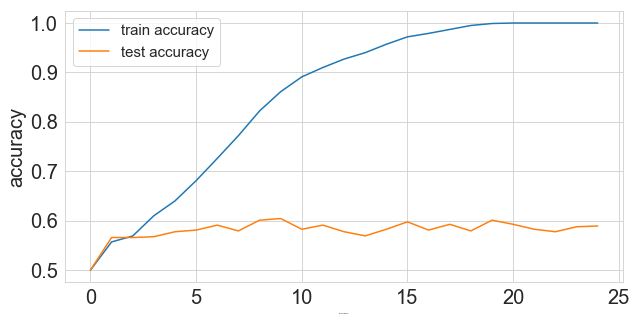

In [30]:
train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1,25):
    
    train_accuracy,test_accuracy = accuracy_cal(df_train,df_test,depth)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
display(train_accuracies, test_accuracies)
    
    

**The graph we optained is because of the cross validation hold-outmethod. The test accuracy is not that good so we try another cross validation.** 

### 2).K-fold Cross Validation

In [43]:
#import model_selection module of scikit-learn
from sklearn import model_selection

if __name__ == "__main__" :
    
    
    #we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    
    #the next step is to randomize the rows of the data
    df = df.sample(frac = 1).reset_index(drop = True)
    
    #initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits = 5)
    
    #fill the new kfold column
    for fold, (trn_,val_) in enumerate(kf.split(X = df)):
        df.loc[val_,"kfold"]  = fold 
        
    
    #save the new with kfold column
    df.to_csv("train_folds.csv" , index = False)

In [44]:
k_fold_df  = pd.read_csv("train_folds.csv")

In [45]:
k_fold_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,9.3,0.33,0.45,1.5,0.057,19.0,37.0,0.99498,3.18,0.89,11.1,4,0
1,7.7,0.96,0.20,2.0,0.047,15.0,60.0,0.99550,3.36,0.44,10.9,2,0
2,11.1,0.45,0.73,3.2,0.066,6.0,22.0,0.99860,3.17,0.66,11.2,3,0
3,13.0,0.32,0.65,2.6,0.093,15.0,47.0,0.99960,3.05,0.61,10.6,2,0
4,8.1,0.87,0.00,2.2,0.084,10.0,31.0,0.99656,3.25,0.50,9.8,2,0


In [46]:
import numpy as np

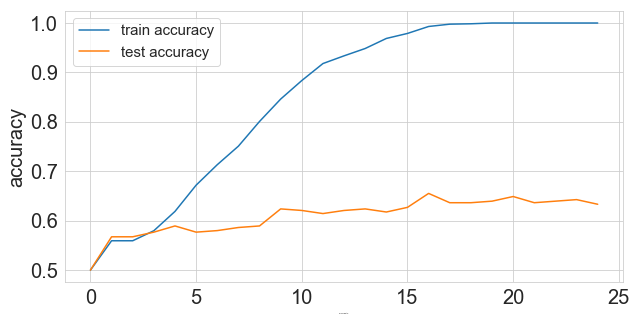

In [51]:
train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1,25):
    
    for i in range(5):
        
        train_sum = []
        test_sum = []
        
        df_test = k_fold_df[k_fold_df["kfold"] == i]
        df_train = k_fold_df[k_fold_df["kfold"] != i]
        
        train_accuracy,test_accuracy = accuracy_cal(df_train,df_test,depth)
        train_sum.append(train_accuracy)
        test_sum.append(test_accuracy)
        
        
    train_accuracies.append(np.mean(train_sum))
    test_accuracies.append(np.mean(test_sum))
     

display(train_accuracies, test_accuracies)

**The above graph obtained by following k-fold cross validation. Test accuracy is not that good but it is better than hold out cross validation accuracy. Let us try another cross validation method.**

Text(0, 0.5, 'count')

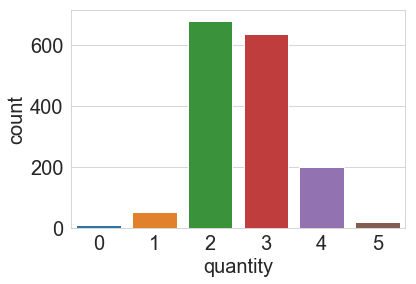

In [17]:
b = sns.countplot(x = "quality",data = df)
b.set_xlabel("quantity",fontsize = 20)
b.set_ylabel("count",fontsize = 20)

**The figure show that the quality of the wine is very much skewed. Some classes have lot of sample but other don't have that many. If we do simple k-fold, we won't have an equal distribution of the targets in every fold. Thus, we chooose stratified k-fold in this case.**

### 3).Stratifed k-fold 

In [40]:
#import model_selection module of scikit-learn
from sklearn import model_selection

if __name__ == "__main__" :
    
    
    #we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    
    #the next step is to randomize the rows of the data
    df = df.sample(frac = 1).reset_index(drop = True)
    
    #fetch targets 
    y = df.quality.values
    
    #initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits = 5)
    
    #fill the new kfold column
    for fold, (t_,v_) in enumerate(kf.split(X = df,y = y)):
        df.loc[v_,"kfold"]  = fold 
        
    
    #save the new with kfold column
    df.to_csv("train_sfolds.csv" , index = False)

In [41]:
sk_fold_df  = pd.read_csv("train_sfolds.csv")

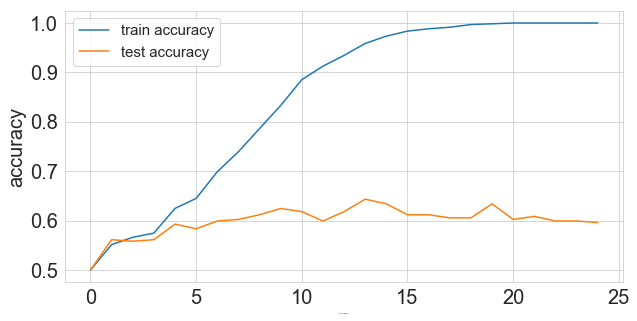

In [42]:
train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1,25):
    
    for i in range(5):
        
        train_sum = []
        test_sum = []
        
        df_test = sk_fold_df[sk_fold_df["kfold"] == i]
        df_train = sk_fold_df[sk_fold_df["kfold"] != i]
        
        train_accuracy,test_accuracy = accuracy_cal(df_train,df_test,depth)
        train_sum.append(train_accuracy)
        test_sum.append(test_accuracy)
        
        
    train_accuracies.append(np.mean(train_sum))
    test_accuracies.append(np.mean(test_sum))
     

display(train_accuracies, test_accuracies)

~We can see that stratifed k-fold is better than hold out but almost same as k-fold cause test accuracy seems to get better. But this accuracy can be improved by applying another method of feature engineering.

ShubhangiDabral13...